### PCA, SpectralClustering and t-SNE

For citation use: 

Emanuel Flores-Bautista, Carenne Ludeña Cronick, Anny
Rodriguez Fersaca, Mario Alberto Martinez-Nuñez, Ernesto Perez-Rueda (2018) Functional
prediction of hypothetical transcription factors of Escherichia coli K-12 based on
expression data. *CSBJ 16 (2018) 157–166* [DOI: 10.1016/j.csbj.2018.03.003](https://doi.org/10.1016/j.csbj.2018.03.003)

**Workflow** 

* PCA
* Spectral CoClustering 
* Data visualization

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np
import matplotlib as mpl
import cycler 

from sklearn import metrics
from sklearn.decomposition import PCA as PCA
from sklearn.cluster import SpectralClustering as specClus

sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.0, 'lines.markersize': 5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#mpl.rc('axes', prop_cycle=(cycler('color', ['b','g','y','m','c']) ))
mpl.rc('text', usetex=False)

tw = 1.5
sns.set_style({"xtick.major.size": 6, "ytick.major.size": 6,
               "xtick.minor.size": 4, "ytick.minor.size": 4,
               'axes.labelsize': 28,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=28) 
mpl.rc('ytick', labelsize=28)
mpl.rc('axes', linewidth=1.75)
plt.gcf().subplots_adjust(bottom=0.15)
sns.set_style({'axes.labelsize': 24})

In [5]:
cd ../Desktop/uni/bioinfo/data/coli

/Users/manoloflores/Desktop/uni/bioinfo/data/coli


### Data pre-processing

In [6]:
x = pd.read_csv('tfs_expression_colombos-sh.txt', delimiter= '\t')

In [7]:
x.head()

,LocusTag,Gene name,Geneid/Contrast_id,7,8,67,71,72,73,79,...,2369,2370,2371,2373,2375,2376,2377,2380,2391,2403
0,b0020,nhaR_Exp,19,0.22819,-0.176810,-0.787492,-0.747549,-0.477536,-0.480511,0.066990,...,0.365203,0.260590,0.306605,0.089285,-0.034140,0.281831,0.236093,0.281028,0.037335,0.719176
1,b0034,caiF_Exp,33,0.23921,0.052925,-0.266336,0.338307,0.089753,0.846272,0.039500,...,-0.399026,-0.552747,-0.449514,-0.512721,-0.520686,-0.602462,-0.516117,0.333613,0.032187,2.497914
2,b0064,araC_Exp,62,-0.47112,-0.458640,-0.273980,-0.988168,-0.789014,-0.770101,-0.233127,...,-0.494652,-0.504424,-0.324391,-1.125806,-1.191488,-0.337221,-0.569363,-0.398553,0.252919,0.549917
3,b0069,sgrR_Exp,67,-0.15713,-0.110750,-0.561140,-0.810840,-0.676467,-0.700357,-0.506644,...,0.034455,0.115539,0.069697,0.037337,0.206643,0.090277,0.088766,0.767310,-0.081904,-0.081382
4,b0076,leuO_Exp,74,-0.10545,0.009588,0.265272,0.531406,0.393352,0.084519,-0.115609,...,-0.023880,-0.038441,0.030371,-0.086107,-0.014157,-0.031186,-0.107373,-0.108011,0.001364,3.713349


We can see that the data is already normalized, with mean ~0 and variance ~1. 

We see that we have some NaNs in our data set. We could replace them using the  `x.fillna(x.mean())` method, but for now, let's drop them. 


In [8]:
x= x.dropna()

#### Dividing the expression and annotation subsets. 

In [9]:
##x_exp is the expression data set.

x_exp = x.iloc[:, 3:]
x_exp.head()

,7,8,67,71,72,73,79,80,81,138,...,2369,2370,2371,2373,2375,2376,2377,2380,2391,2403
0,0.22819,-0.176810,-0.787492,-0.747549,-0.477536,-0.480511,0.066990,-0.043130,0.207997,0.211130,...,0.365203,0.260590,0.306605,0.089285,-0.034140,0.281831,0.236093,0.281028,0.037335,0.719176
1,0.23921,0.052925,-0.266336,0.338307,0.089753,0.846272,0.039500,-0.040418,0.036057,-1.885600,...,-0.399026,-0.552747,-0.449514,-0.512721,-0.520686,-0.602462,-0.516117,0.333613,0.032187,2.497914
2,-0.47112,-0.458640,-0.273980,-0.988168,-0.789014,-0.770101,-0.233127,-0.474816,-0.109717,0.530260,...,-0.494652,-0.504424,-0.324391,-1.125806,-1.191488,-0.337221,-0.569363,-0.398553,0.252919,0.549917
3,-0.15713,-0.110750,-0.561140,-0.810840,-0.676467,-0.700357,-0.506644,-0.486856,-0.571365,-0.445910,...,0.034455,0.115539,0.069697,0.037337,0.206643,0.090277,0.088766,0.767310,-0.081904,-0.081382
4,-0.10545,0.009588,0.265272,0.531406,0.393352,0.084519,-0.115609,-0.007976,-0.047219,0.030524,...,-0.023880,-0.038441,0.030371,-0.086107,-0.014157,-0.031186,-0.107373,-0.108011,0.001364,3.713349


In [10]:
##x_annot is the annotation data set. 
x_annot = x.iloc[:, :3]
x_annot.head()

,LocusTag,Gene name,Geneid/Contrast_id
0,b0020,nhaR_Exp,19
1,b0034,caiF_Exp,33
2,b0064,araC_Exp,62
3,b0069,sgrR_Exp,67
4,b0076,leuO_Exp,74


### Principal Component Analysis PCA

In [11]:
np.random.seed(42) #for reproducibility

In [12]:
pca= PCA(random_state= 42)
pca.fit(x_exp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

(0, 50)

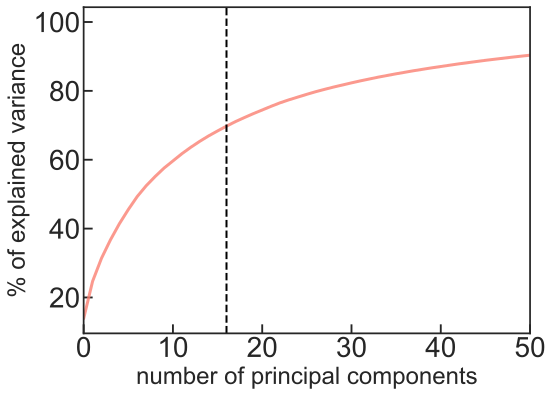

In [13]:
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)
# look at it
plt.figure(figsize = (8,6))
plt.plot(cum_exp_var*100, lw = 3, color = 'salmon', alpha = 0.8)
plt.xlabel('number of principal components', fontsize= 24)
plt.ylabel('% of explained variance', fontsize= 24)
plt.axvline(x= 16 , color='k', linestyle='--')
plt.xlim(0,50)


With 16 only PCs we have ~68% of the total variance. Let's proceed to transform our data.

In [14]:
n_components = 16

pca = PCA(n_components= n_components, random_state= 42)

In [15]:
pca.fit(x_exp)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
df_pca = pca.transform(x_exp)

#Convert back to a nice, tidy dataframe

df_pca = pd.DataFrame(df_pca, 
                         columns= ['PC' +  str(x) for x in range(1, n_components+1)],
                         index= x_exp.index)

In [17]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0.382470,1.689795,0.584327,-0.709450,2.708029,-1.081752,-1.632764,-0.907376,0.378626,-0.015184,-2.224203,-0.810958,-0.670310,-1.243643,0.384089,-1.191212
1,1.605591,2.546868,1.454269,-1.295652,-4.723568,-0.829734,0.635663,2.715156,1.842636,-3.555796,-1.458057,-0.927706,2.818832,-2.899927,0.967031,0.145968
2,7.751926,-2.152036,0.217418,-2.001164,1.676427,2.224719,1.543529,1.255097,1.788288,0.176689,0.924988,2.187479,0.784427,-1.022092,0.892507,-1.336523
3,0.643402,2.534750,-0.778045,2.660554,-0.798267,-1.245614,-0.418562,1.880263,-0.748758,0.162371,0.606137,0.604664,-0.376917,-1.795390,-1.089251,-0.407578
4,-0.790665,1.281232,-2.082890,1.880974,-1.524523,-0.877303,1.547018,-0.461863,1.663018,1.500032,0.405606,-0.085604,-0.672166,1.147773,1.758000,-1.477866


In [18]:
pca_plot= df_pca.iloc[:,:4] ## Let's slice the first four PCs for visualization

## Spectral Biclustering

Let's do a quick test for the number of clusters, $k$, to choose.

In [19]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [20]:
def choose_k(data):
    k_tests = np.arange(2, 30)
    wcss = []
    silo = []
    for k in k_tests: 
        clustering = KMeans(k, random_state= 42).fit(data)
        wcss.append(clustering.inertia_)
        silo.append(silhouette_score(data, clustering.predict(data)))
    ##Plot for the inertia
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    plt.xlabel('number of clusters', fontsize = 28)
    plt.ylabel('inertia', fontsize = 28)
    #plt.title('Inertia')
    plt.plot(k_tests, wcss, color = 'salmon', lw = 3)
    plt.scatter(k_tests, wcss, marker = 'o', edgecolor= 'k', alpha = 0.54)

    ##Plot for the silhouette score
    plt.subplot(1,2,2)
    #plt.title('Silhouette Score')
    
    
    plt.plot(k_tests, silo , color = 'salmon')
    plt.xlabel('number of clusters', fontsize = 28)
    plt.ylabel('silhouette score', fontsize = 28)
    plt.scatter(k_tests, silo, marker = 'o', edgecolor= 'k', alpha = 0.54)


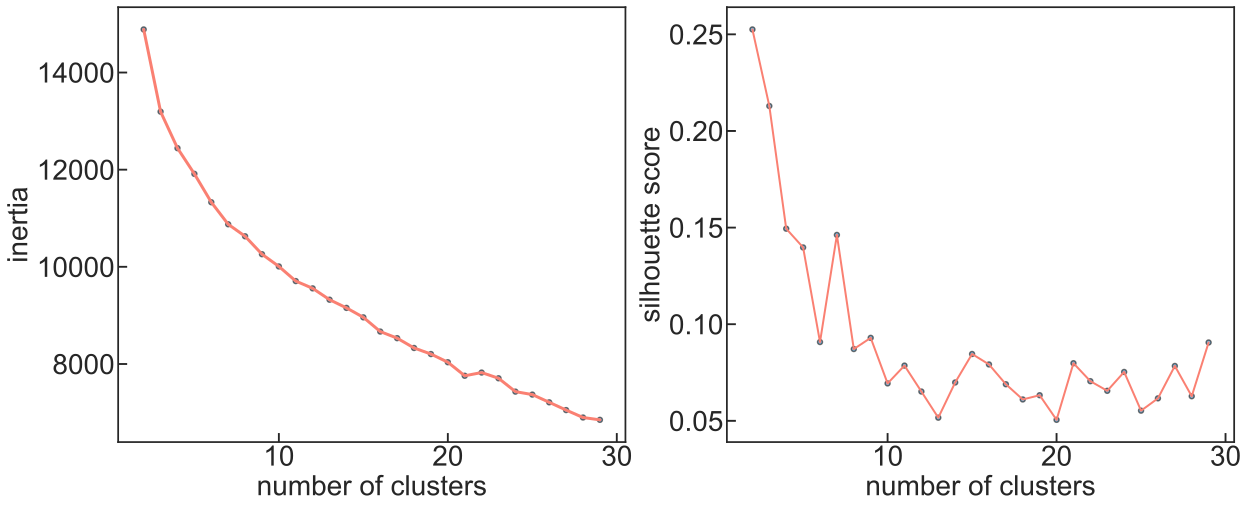

In [21]:
choose_k(df_pca)
#plt.savefig('inertia_silhouette_score.png', dpi = 380)

We can see that choosing ~11 or 21 clusters we will have a good clustering on our data after the PCA. Based on the notion that each cluster is a functional module, we'll choose 12 clusters. 

In [22]:
from sklearn.cluster.bicluster import SpectralCoclustering

n_clusters = 12

model= SpectralCoclustering(n_clusters= n_clusters, random_state= 42)

model.fit(df_pca)

SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=12,
           n_init=10, n_jobs=1, n_svd_vecs=None, random_state=42,
           svd_method='randomized')

In [23]:
print("Number of TFs corresponding to each cluster: " , np.sum(model.rows_, axis= 1))

Number of TFs corresponding to each cluster:  [51 12  7 65  8 18 32 22 12 28  4 17]


Let's make a list corresponding to the cluster labels for each gene, that we can then append to a DataFrame. 

In [24]:
labels= model.row_labels_ 

In [25]:
cluster_labels = []
for row in labels:
    row = row + 1 
    row = 'cluster' + str(row)
    cluster_labels.append(row)

In [26]:
# Add the clustering labels as a column on the df_pca DataFrame
df_pca['labels']= cluster_labels

In [27]:
pca_plot['labels']= cluster_labels

/Users/manoloflores/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Projections on the first PCs with cluster labels

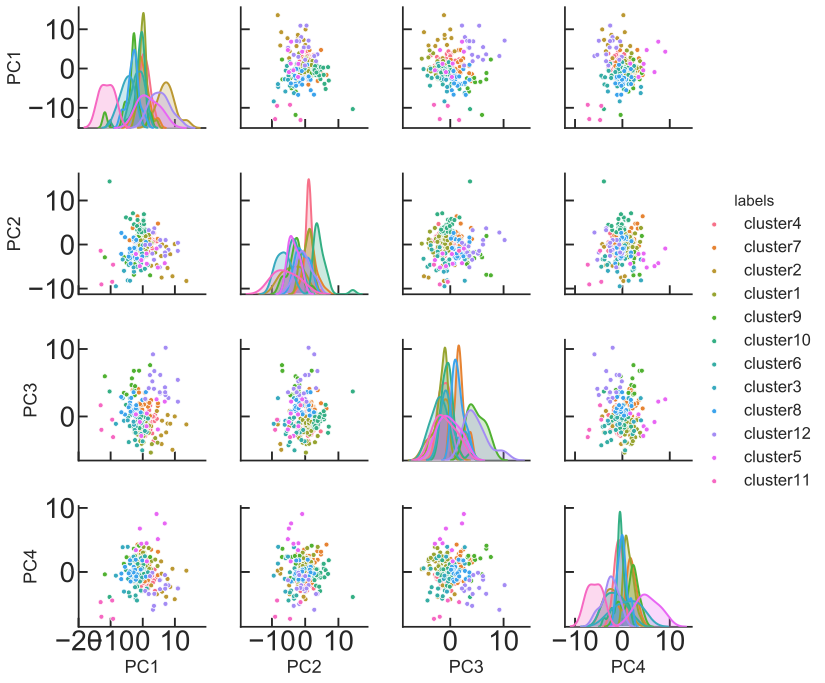

In [28]:
_ = sns.pairplot(pca_plot, hue = 'labels', diag_kind = 'kde')
#plt.savefig('PCA_pairplot_after_Biclustering.png', dpi = 380)

/Users/manoloflores/anaconda/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


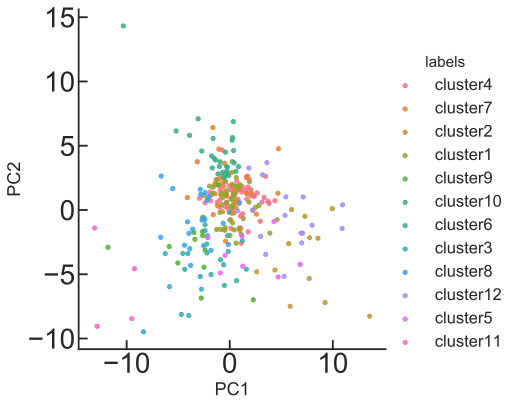

In [29]:
g = sns.lmplot( x='PC1', y='PC2', data = pca_plot, fit_reg=False, hue='labels',
               legend=True, scatter_kws={"alpha":0.85,"s":18} , size = 6)

Let's join the annotation data back together for plotting.

In [30]:
pca_plot_ = x_annot.join(pca_plot)

In [32]:
pwd

'/Users/manoloflores/Desktop/uni/bioinfo/data/coli'

In [33]:
pca_plot_.to_csv('../../../../df_for_interactive_viz.csv', index = False)

### Heatmap using Matplotlib and Seaborn

Let's do a correlation heatmap, using the `df_pca` object and the cluster labels. 

In [34]:
df_pca.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,labels
0,0.382470,1.689795,0.584327,-0.709450,2.708029,-1.081752,-1.632764,-0.907376,0.378626,-0.015184,-2.224203,-0.810958,-0.670310,-1.243643,0.384089,-1.191212,cluster4
1,1.605591,2.546868,1.454269,-1.295652,-4.723568,-0.829734,0.635663,2.715156,1.842636,-3.555796,-1.458057,-0.927706,2.818832,-2.899927,0.967031,0.145968,cluster7
2,7.751926,-2.152036,0.217418,-2.001164,1.676427,2.224719,1.543529,1.255097,1.788288,0.176689,0.924988,2.187479,0.784427,-1.022092,0.892507,-1.336523,cluster2


In [35]:
clusters_hmap = df_pca.sort_values(['labels'])

In [36]:
del(clusters_hmap['labels'])

In [37]:
clusters_hmap_transposed = clusters_hmap.T

In [38]:
clusters_hmap_transposed.tail(3)

,133,262,184,42,136,255,135,51,115,249,...,76,223,70,209,111,131,6,301,75,83
PC14,-0.387767,0.089146,-1.893182,-1.459761,0.814974,-0.570434,-2.555025,-0.616315,-0.928949,0.349108,...,0.437211,0.777911,-1.987245,-1.294609,-0.478919,-0.490316,0.018072,0.783806,-1.509300,-0.124650
PC15,3.073997,-0.023604,-1.584343,1.674468,0.312266,-1.311807,1.522442,1.281345,0.769621,-0.378698,...,0.958234,-0.800170,0.337927,-0.063899,-0.192912,0.830332,-1.006762,0.448864,1.091112,-1.215465
PC16,-0.239018,-0.429876,-1.374463,0.403548,0.740305,-0.705452,0.660990,2.449999,1.351188,0.649071,...,0.402679,-0.573056,0.091933,-0.273432,0.231252,2.019791,-0.739654,0.278585,-0.790474,-1.504601


In [39]:
clusters_hmap_transposed_corr = clusters_hmap_transposed.corr()

In [ ]:
##SpecClus Heatmap using Seaborn

fig, ax = plt.subplots()

fig.set_size_inches(34, 34)


g = sns.heatmap(clusters_hmap_transposed_corr, cmap= 'viridis_r', robust= True,  linewidths=0.2, cbar= False)

#g.x.set_tick_position('none')
#g.y.set_tick_position('none')

plt.xticks([], [])
plt.yticks([], [])
plt.title('Pairwise TF-TF correlation after biclustering', fontsize = 40 )
#plt.savefig('../pairwise_TF_TF_corr_matrix.png', dpi = 420)

#g.set_xticklabels(g.get_xticklabels(), rotation = 55, fontsize = 9.1)
#g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)

Text(0.5,1,'Pairwise TF-TF correlation after biclustering')

### Conclusion

We successfully extracted functionally robust clusters of TFs using PCA and spectral biclustering. 